In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/weight-height.csv', index_col = 0)
df.head()

,Height(Inches),Weight(Pounds)
Gender,,
Male,73.847017,241.893563
Male,68.781904,162.310473
Male,74.110105,212.740856
Male,71.730978,220.042470
Male,69.881796,206.349801


In [30]:
df.tail()

,Height(Inches),Weight(Pounds)
Gender,,
Female,66.172652,136.777454
Female,67.067155,170.867906
Female,63.867992,128.475319
Female,69.034243,163.852461
Female,61.944246,113.649103


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, Male to Female
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height(Inches)  9997 non-null   float64
 1   Weight(Pounds)  9997 non-null   float64
dtypes: float64(2)
memory usage: 234.4+ KB


In [32]:
df.describe()

,Height(Inches),Weight(Pounds)
count,9997.000000,9997.000000
mean,66.366724,161.433664
std,3.847752,32.110873
min,54.263133,64.700127
25%,63.504799,135.814924
50%,66.317755,161.193433
75%,69.173577,187.187094
max,78.998742,269.989699


EDA(Exploratory Data Analysis)

In [33]:
df.rename(columns = {
    'Height(Inches)' : 'Height',
    'Weight(Pounds)' : 'Weight'
}, inplace = True)

df.columns

Index(['Height', 'Weight'], dtype='object')

In [34]:
df

,Height,Weight
Gender,,
Male,73.847017,241.893563
Male,68.781904,162.310473
Male,74.110105,212.740856
Male,71.730978,220.042470
Male,69.881796,206.349801
...,...,...
Female,66.172652,136.777454
Female,67.067155,170.867906
Female,63.867992,128.475319


In [35]:
df['Height'] = df['Height']*(0.0254)
df

,Height,Weight
Gender,,
Male,1.875714,241.893563
Male,1.747060,162.310473
Male,1.882397,212.740856
Male,1.821967,220.042470
Male,1.774998,206.349801
...,...,...
Female,1.680785,136.777454
Female,1.703506,170.867906
Female,1.622247,128.475319


In [36]:
df['Weight'] = df['Weight']/2.205
df

,Height,Weight
Gender,,
Male,1.875714,109.702296
Male,1.747060,73.610192
Male,1.882397,96.481114
Male,1.821967,99.792504
Male,1.774998,93.582676
...,...,...
Female,1.680785,62.030591
Female,1.703506,77.491114
Female,1.622247,58.265451


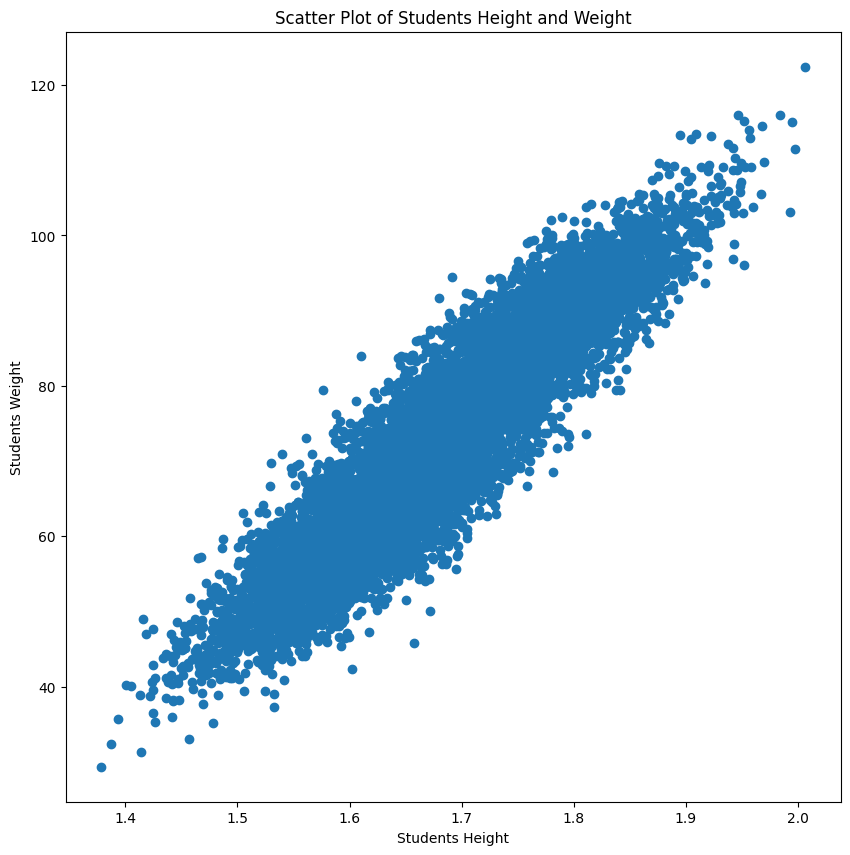

In [37]:
plt.figure(figsize = (10, 10))
plt.scatter(x = df.Height, y = df.Weight)
plt.xlabel('Students Height')
plt.ylabel('Students Weight')
plt.title('Scatter Plot of Students Height and Weight')
plt.show()

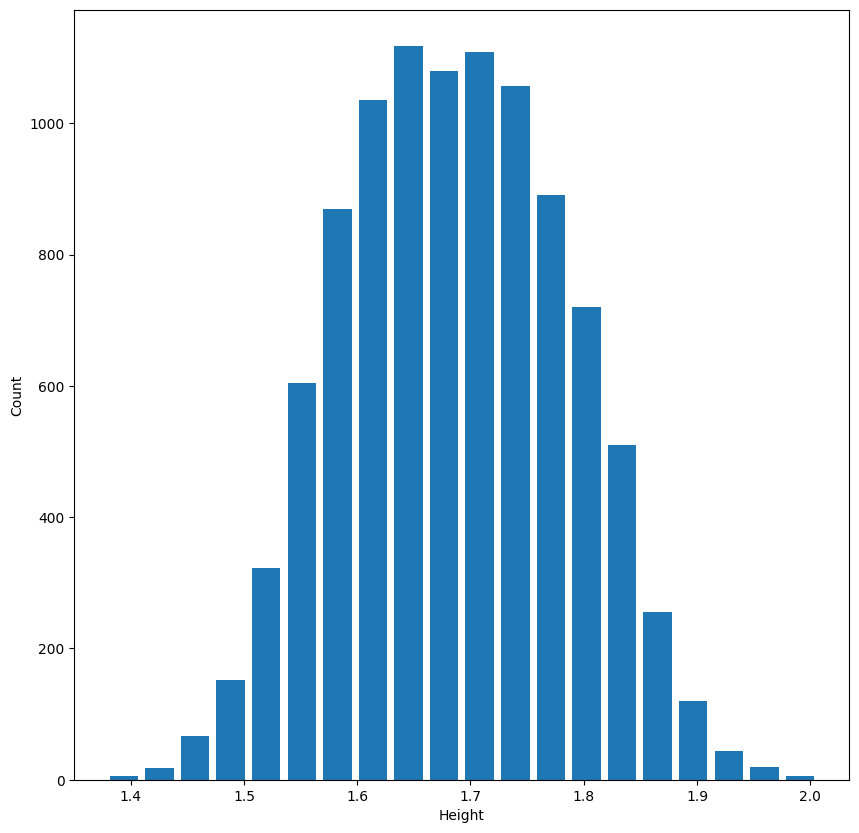

In [38]:
plt.figure(figsize= (10, 10))
plt.hist(df['Height'], bins = 20, rwidth = 0.8)
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()

Data Cleaning

In [39]:
df.isnull().sum()

,0
Height,3
Weight,3


In [40]:
df.mean()

,0
Height,1.685715
Weight,73.212546


In [41]:
clean_df = df.fillna(df.mean())
clean_df.isnull().sum()

,0
Height,0
Weight,0


We have to now train the data. So for that we are going to make two differnt dataframes.

*  The first one which will only comprise of the height in that we will drop the weight.

*  The second one which will only comprise of the weight in that we will drop the height.



In [42]:
x = clean_df.drop('Weight', axis = 'columns')
y = clean_df.drop('Height', axis = 'columns')
print('shape of X =', x.shape)
print('shape of y =', y.shape)

shape of X = (10000, 1)
shape of y = (10000, 1)


In [43]:
x.head()

,Height
Gender,
Male,1.875714
Male,1.747060
Male,1.882397
Male,1.821967
Male,1.774998


In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [45]:
print('shape of x_train =', x_train.shape)
print('shape of y_train =', y_train.shape)
print('shape of x_test =', x_test.shape)
print('shape of y_test =', y_test.shape)

shape of x_train = (8000, 1)
shape of y_train = (8000, 1)
shape of x_test = (2000, 1)
shape of y_test = (2000, 1)


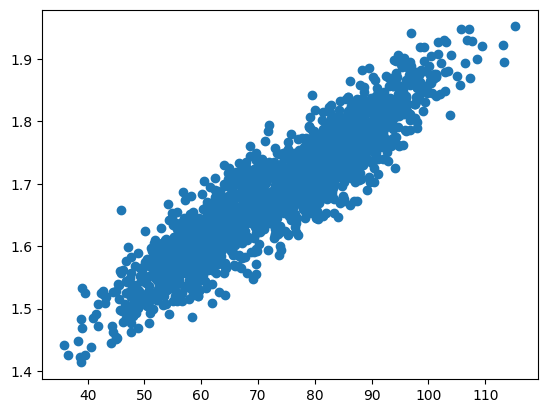

In [46]:
plt.scatter(y_test, x_test)
plt.show()

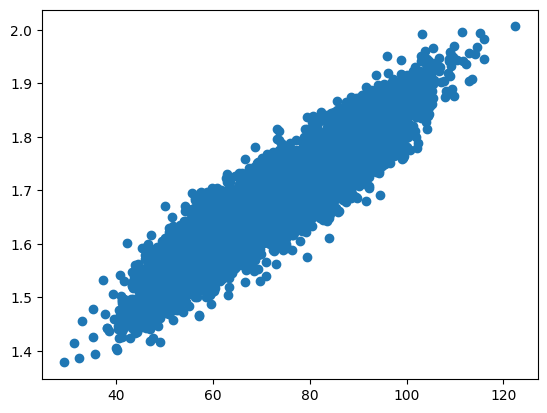

In [47]:
plt.scatter(y_train, x_train)
plt.show()

Select a model and train it.

In [48]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [49]:
# Coefficient

model.coef_

array([[137.90254542]])

In [50]:
# Intercept

model.intercept_

array([-159.20199372])

In [51]:
height = float(input("Enter the value of height to get it's estimated weight. "))

m = model.coef_
c = model.intercept_
x = height
y = m*x + c
print("The estimated weight is", y)

Enter the value of height to get it's estimated weight. 9
The estimated weight is [[1081.92091505]]


In [52]:
weight_pred = model.predict(x_test)
weight_pred

array([[96.76081825],
       [84.01188081],
       [62.69276187],
       ...,
       [89.67797312],
       [69.74367412],
       [68.44991702]])

In [56]:
pd.DataFrame(np.c_[x_test, y_test, weight_pred], columns = ["height", "weight", "weight_predicted"])


,height,weight,weight_predicted
0,1.856114,95.743678,96.760818
1,1.763665,80.891862,84.011881
2,1.609069,65.339096,62.692762
3,1.736630,84.143564,80.283738
4,1.569934,55.029298,57.295931
...,...,...,...
1995,1.782427,91.479833,86.599238
1996,1.670166,69.063323,71.118081
1997,1.804753,97.623028,89.677973
1998,1.660199,72.053155,69.743674


In [57]:
lr_score = model.score(x_test, y_test)
print('The score of the model is', lr_score)

The score of the model is 0.8528947475287285


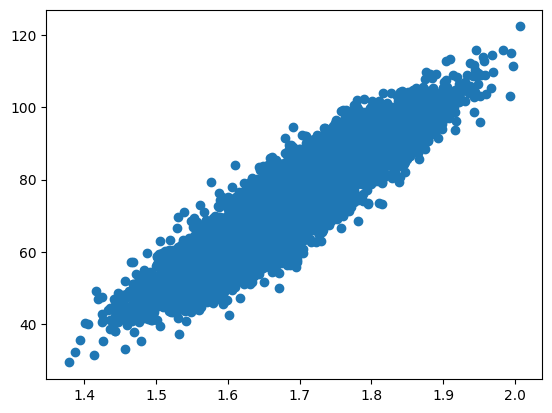

In [58]:
plt.scatter(x_train, y_train)
plt.show()

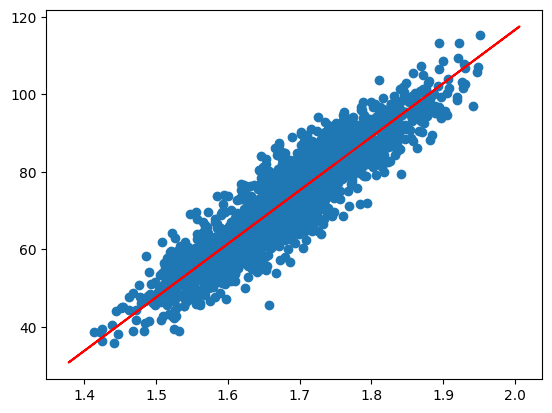

In [65]:
y_train = model.predict(x_train)
plt.scatter(x_test, y_test)
plt.plot(x_train, y_train, color = 'red')
plt.show()

In [67]:
import joblib
joblib.dump(model, 'weight-height.pkl')

['weight-height.pkl']

In [68]:
model2 = joblib.load('weight-height.pkl')

In [71]:
height - float(input('enter the value of height to ge the estimate weight! '))
model2.predict([[height]])

enter the value of height to ge the estimate weight! 61


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1081.92091505]])